In [3]:
# Read in all the libraries and data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

county_data = pd.read_csv("project_477_777.csv", index_col='Row.Label')

# Introduction
## Y-Variable Selection

The column "Poor.Health" contains the proportion with poor health status for each county in the dataset. This is the variable I will be examining as my y-variable. 

Table of Contents:
1. Graphical and Numerical Summaries
2. Exploring the Questions
3. Predictive Model

# Graphical and Numerical Summaries
## The Y-Variable
According to the histogram and summary statistics below, the distribution of the county-level proportion with poor health status seems to be slightly **right-skewed** with **some outliers** towards the **right end of the distribution**. This indicates that while a majority of counties seem to have low proportions with poor health status, there are counties with much higher proportions.

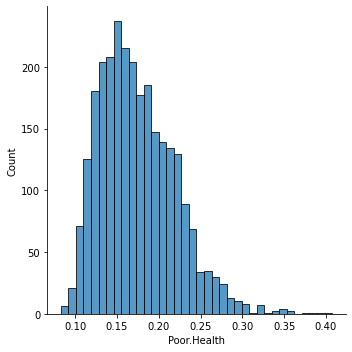

count    2715.000000
mean        0.174385
std         0.045176
min         0.082900
25%         0.140350
50%         0.167300
75%         0.203950
max         0.407300
Name: Poor.Health, dtype: float64


In [4]:
#Histogram
prop_poor_health = county_data['Poor.Health']
sns.displot(prop_poor_health);
plt.show()
#Summary Statistics
print(prop_poor_health.describe())

# Graphical and Numerical Summaries
## The Y-Variable
Analysis shows that the top 5 counties with highest proportion with poor health status are: **Starr County (TX), Zavala County (TX), East Carroll Parrish (LA), Willacy County (TX), and Webb County (TX)**. However, these counties **do not lie** in the top 5 states with highest average per-county proportion with poor health status. These states are: **Arkansas (AR), Alabama (AL), West Virginia (WV), Mississippi (MS), and Kentucky (KY)**. This difference suggests that there might be **health disparities** in some states. In other words, there might be a wide gap in health status between counties in certain states.

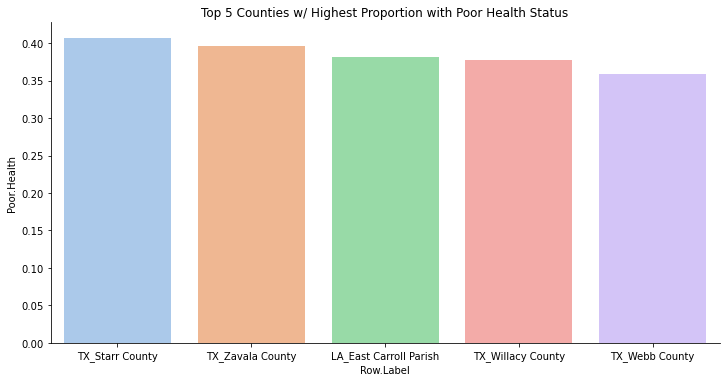

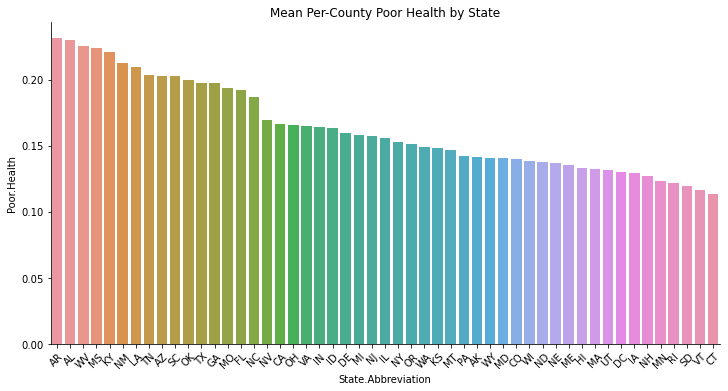

In [5]:
#Top 5 Counties with Highest Poor.Health Values
top_five = county_data.nlargest(5, ['Poor.Health'])
top_five_prop = top_five[['Poor.Health']]
top_five_prop.reset_index(inplace = True)
sns.catplot(x = 'Row.Label', y = "Poor.Health", data = top_five_prop, kind = "bar", aspect=2, palette = 'pastel').set(title = 'Top 5 Counties w/ Highest Proportion with Poor Health Status')
#Mean Poor Health Proportions by State
mean = county_data.groupby('State.Abbreviation')['Poor.Health'].mean()
mean_poor_health = mean.to_frame()
mean_poor_health.reset_index(inplace = True)
mean_poor_health_sorted = mean_poor_health.sort_values(by=['Poor.Health'],ascending=False)
sns.catplot(x = 'State.Abbreviation', y = "Poor.Health", data = mean_poor_health_sorted, kind = "bar", aspect=2).set(title = 'Mean Per-County Poor Health by State')
plt.xticks(rotation = 45)
plt.show()

# Graphical and Numerical Summaries
## The X-Variables
For the purposes of initial exploratory analysis, it is interesting to hone in on a single variable from each of the following categories: Access / Quality of Care, Demographic Characteristics, Social Determinants of Health – Behavioral, Social Determinants of Health – Environmental. 

# Graphical and Numerical Summaries
## Insurance Status 
### Histogram
The histogram shows that the distribution of the county-level proportion of people that do not have health insurance is slightly **right-skewed** with **some outliers** towards the **right end of the distribution**. This suggests that while the majority of counties have a low proportion of uninsured inhabitants, some have a very high proportion, relatively speaking.
### Summary
The summary statistics reaffirm the results of the histogram. The per-county proportion of uninsured people ranges from **~0.02 to ~0.31**, indicating that among all the counties, the largest proportion of uninsured people is **15.5 times larger** than the smallest proportion of uninsured people.
### Top 5
It is interesting to note that the counties with the highest proportions of uninsured people all lie in **Texas**; it is the state with the highest mean proportion of uninsured people. As mentioned above, four of the top five counties with highest poor health proportion were are also located in Texas, but Texas **does not** feature as one of the top five states with highest mean poor health proportion.

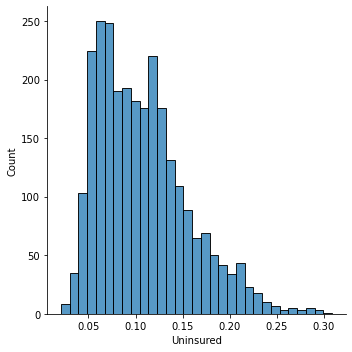

count    2715.000000
mean        0.107790
std         0.047841
min         0.020700
25%         0.069200
50%         0.100700
75%         0.134650
max         0.308800
Name: Uninsured, dtype: float64


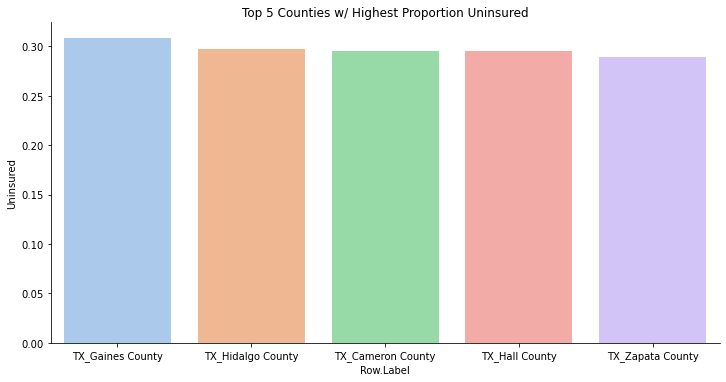

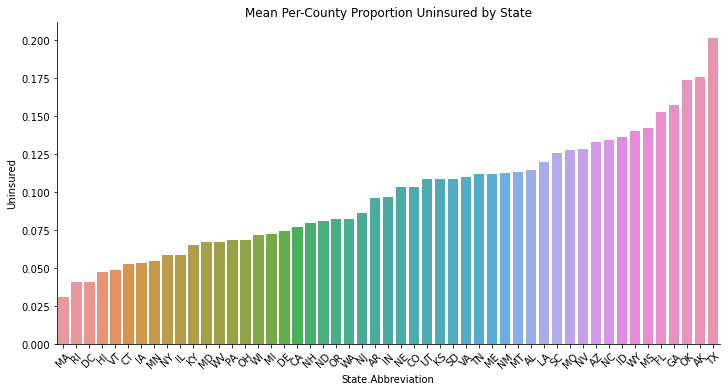

In [6]:
#Insurance Status
##Histogram
prop_uninsured = county_data['Uninsured']
sns.displot(prop_uninsured);
plt.show()
##Summary
print(prop_uninsured.describe())
##Top5
top_five_uninsured = county_data.nlargest(5, ['Uninsured'])
top_five_uninsured_df = top_five_uninsured[['Uninsured']]
top_five_uninsured_df.reset_index(inplace = True)
sns.catplot(x = 'Row.Label', y = "Uninsured", data = top_five_uninsured_df, kind = "bar", aspect=2, palette = 'pastel').set(title = 'Top 5 Counties w/ Highest Proportion Uninsured')
#Mean Proportion Uninsured by State
mean2 = county_data.groupby('State.Abbreviation')['Uninsured'].mean()
mean_uninsured = mean2.to_frame()
mean_uninsured.reset_index(inplace = True)
mean_uninsured_sorted = mean_uninsured.sort_values(by=['Uninsured'])
sns.catplot(x = 'State.Abbreviation', y = "Uninsured", data = mean_uninsured_sorted, kind = "bar", aspect=2).set(title = 'Mean Per-County Proportion Uninsured by State')
plt.xticks(rotation = 45)
plt.show()

# Graphical and Numerical Summaries
## Life Expectancy 
### Histogram
The histogram shows that the distribution of county-level life expectancy is relatively **normal** with **some outliers** towards the **right end of the distribution**. This suggests that while the majority of counties have a lower life expectancies, some have very high life expectancies, relatively speaking.
### Summary
The summary statistics reaffirm the results of the histogram. Per-county life expectancy ranges from **~67 to ~98**, indicating that among all the counties, the highest life expectancy is almost **1.5** times larger than the lowest life expectancy.
### Top 5
The top five states with lowest mean life expectancy are: **Mississippi (MS), Kentucky (KY), Alabama (AL), Arkansas (AR), and Tennessee (TN)**. It is interesting to note that four of these states **(MS, KY, AL, and AR)** also feature in the top five states with highest proportion of people with poor health status. 

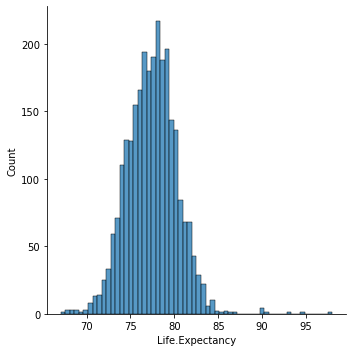

count    2715.000000
mean       77.464751
std         2.832091
min        67.068555
25%        75.596650
50%        77.544959
75%        79.232825
max        97.965235
Name: Life.Expectancy, dtype: float64


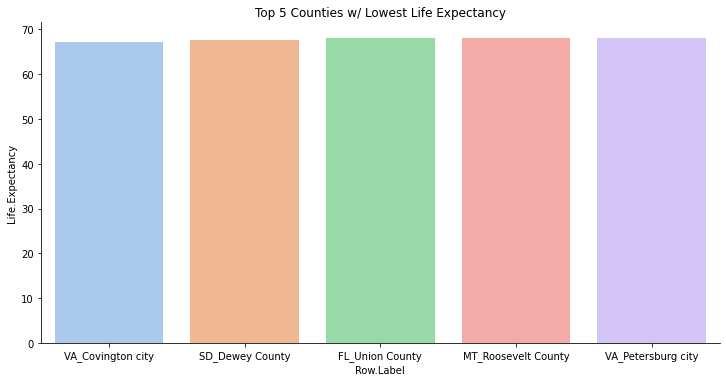

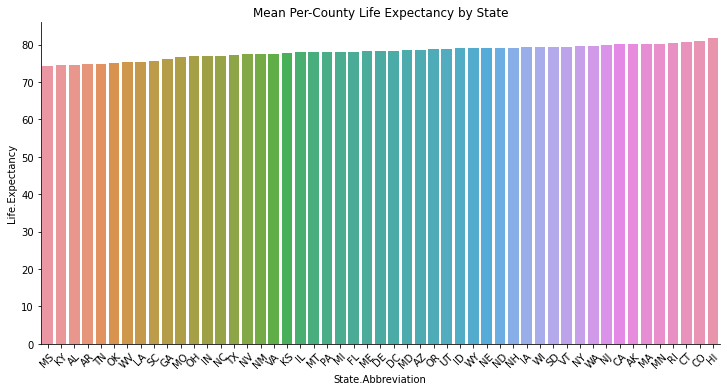

In [7]:
#Life Expectancy
LE = county_data['Life.Expectancy']
sns.displot(LE);
plt.show()
##Summary
print(LE.describe())
##Top5
top_five_LE = county_data.nsmallest(5, ['Life.Expectancy'])
top_five_LE_df = top_five_LE[['Life.Expectancy']]
top_five_LE_df.reset_index(inplace = True)
sns.catplot(x = 'Row.Label', y = "Life.Expectancy", data = top_five_LE_df, kind = "bar", aspect=2, palette = 'pastel').set(title = 'Top 5 Counties w/ Lowest Life Expectancy')
#Mean Life Expectancy by State
mean3 = county_data.groupby('State.Abbreviation')['Life.Expectancy'].mean()
mean_LE = mean3.to_frame()
mean_LE.reset_index(inplace = True)
mean_LE_sorted = mean_LE.sort_values(by=['Life.Expectancy'])
sns.catplot(x = 'State.Abbreviation', y = "Life.Expectancy", data = mean_LE_sorted, kind = "bar", aspect=2).set(title = 'Mean Per-County Life Expectancy by State')
plt.xticks(rotation = 45)
plt.show()

# Graphical and Numerical Summaries
## Adult Obesity
### Histogram
The histogram shows that the distribution of county-level proportions of adult obesity is relatively **normal**. There do not seem to be any outliers, meaning that proportions towards the right end of the distribution and proportions towards the left end of the distribution fall relatively symmetrically about the mean.
### Summary
The summary statistics reaffirm the results of the histogram. The mean and median are almost exactly equal, suggesting a normal distribution.
### Top 5
The top five states with lowest mean life expectancy are: **Mississippi (MS), Alabama (AL), West Virginia (WV), Louisiana (LA), and Arkansas (AR)**. It is interesting to note that once again, four of these states **(MS, AL, WV, and AR)** also feature in the top five states with highest proportion of people with poor health status. 

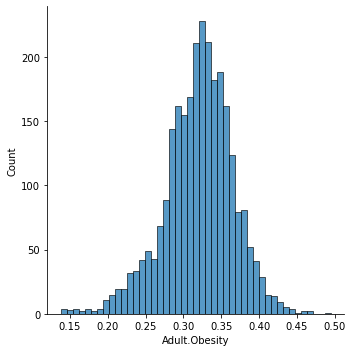

count    2715.000000
mean        0.320086
std         0.045581
min         0.138000
25%         0.294000
50%         0.323000
75%         0.350000
max         0.495000
Name: Adult.Obesity, dtype: float64


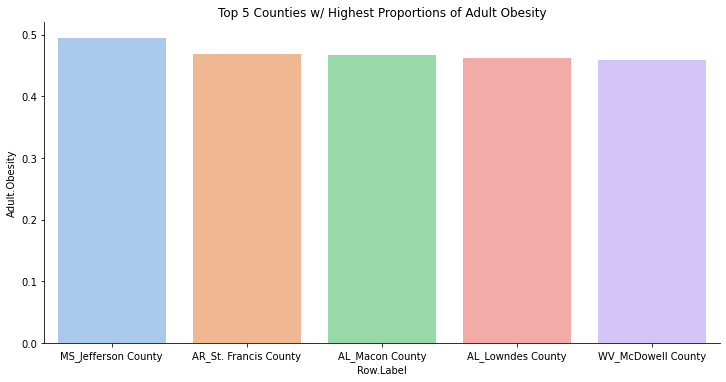

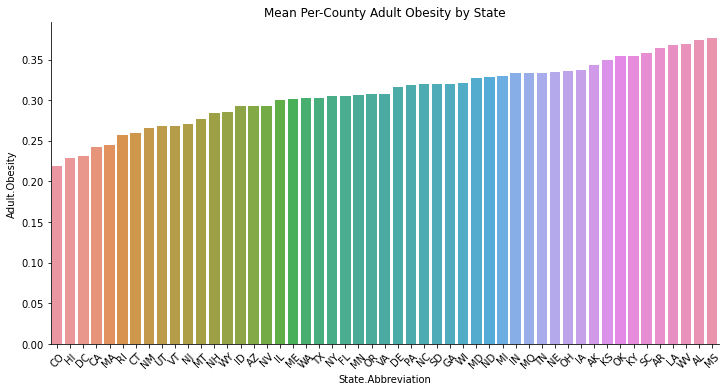

In [8]:
#Adult Obesity
##Histogram
prop_obesity = county_data['Adult.Obesity']
sns.displot(prop_obesity);
plt.show()
##Summary
print(prop_obesity.describe())
##Top5
top_five_obesity = county_data.nlargest(5, ['Adult.Obesity'])
top_five_obesity_df = top_five_obesity[['Adult.Obesity']]
top_five_obesity_df.reset_index(inplace = True)
sns.catplot(x = 'Row.Label', y = "Adult.Obesity", data = top_five_obesity_df, kind = "bar", aspect=2, palette = 'pastel').set(title = 'Top 5 Counties w/ Highest Proportions of Adult Obesity')
#Mean Adult Obesity by State
mean4 = county_data.groupby('State.Abbreviation')['Adult.Obesity'].mean()
mean_obesity = mean4.to_frame()
mean_obesity.reset_index(inplace = True)
mean_obesity_sorted = mean_obesity.sort_values(by=['Adult.Obesity'])
sns.catplot(x = 'State.Abbreviation', y = "Adult.Obesity", data = mean_obesity_sorted, kind = "bar", aspect=2).set(title = 'Mean Per-County Adult Obesity by State')
plt.xticks(rotation = 45)
plt.show()

# Graphical and Numerical Summaries
## Median Household Income
### Histogram
The histogram shows that the distribution of county-level median household income is relatively **right-skewed** with **some outliers** towards the **right end of the distribution**. This suggests that while the majority of counties have lower median household income, some have very median household income, relatively speaking.
### Summary
The summary statistics reaffirm the results of the histogram. Per-county median household income ranges from **~25569 to ~136191**, indicating that among all the counties, the highest median household income is about **5.3** times larger than the lowest median household income .
### Top 5
The top five states with lowest median household income are: **Arkansas (AR), Mississippi (MS), West Virginia (WV), Alabama (AL), and New Mexico (NM)**. It is interesting to note that four of these states **(AR, MS, WV, and AL)** also feature in the top five states with highest proportion of people with poor health status. 

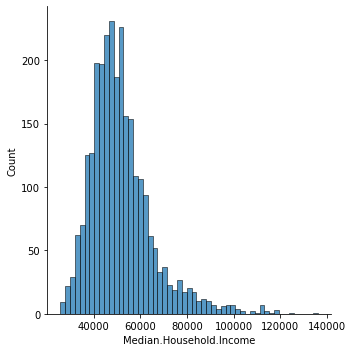

count      2715.000000
mean      51606.557274
std       13650.706994
min       25569.000000
25%       42680.000000
50%       49350.000000
75%       57274.500000
max      136191.000000
Name: Median.Household.Income, dtype: float64


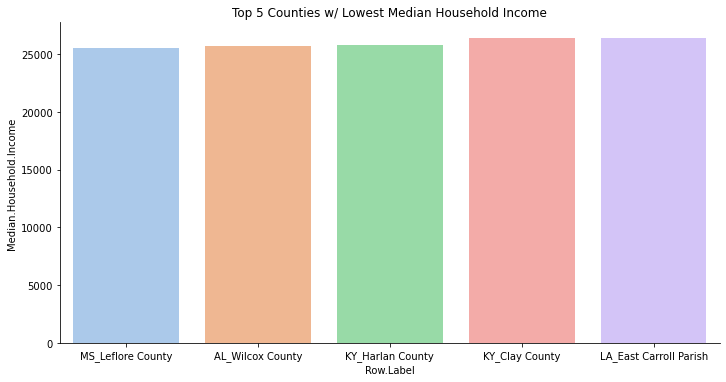

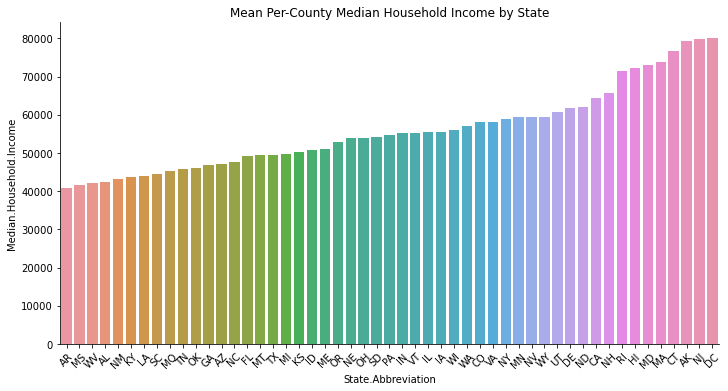

In [9]:
#Median Household Income
##Histogram
MHI = county_data['Median.Household.Income']
sns.displot(MHI);
plt.show()
##Summary
print(MHI.describe())
##Top5
top_five_MHI = county_data.nsmallest(5, ['Median.Household.Income'])
top_five_MHI_df = top_five_MHI[['Median.Household.Income']]
top_five_MHI_df.reset_index(inplace = True)
sns.catplot(x = 'Row.Label', y = "Median.Household.Income", data = top_five_MHI_df, kind = "bar", aspect=2, palette = 'pastel').set(title = 'Top 5 Counties w/ Lowest Median Household Income')
#Mean Household Income by State
mean5 = county_data.groupby('State.Abbreviation')['Median.Household.Income'].mean()
mean_MHI = mean5.to_frame()
mean_MHI.reset_index(inplace = True)
mean_MHI_sorted = mean_MHI.sort_values(by=['Median.Household.Income'])
sns.catplot(x = 'State.Abbreviation', y = "Median.Household.Income", data = mean_MHI_sorted, kind = "bar", aspect=2).set(title = 'Mean Per-County Median Household Income by State')
plt.xticks(rotation = 45)
plt.show()

# Addressing the Questions

The initial exploratory analysis of the **y-variable** highlights a few counties and states of interest, providing insight into how county-level differences in health status translate to the state level. Differences in health status based on state point to potential **health disparities** in these states. Initial analyses of a small subset of **x-variables**,  in which one variable from each of the four given categories was assessed, revealed how various potential predictors of poor health are distributed. **These findings have prompted the following questions**:

## Questions:
1. Which social determinants of health best predict poor health status - behavioral or environmental?
2. Which demographic characteristics are most important for predicting poor health status?
3. Are there interesting associations between behavioral determinants of health, environmental determinants of health, and demographic characteristics?
4. Are there states with large health disparities? What could be contributing to those disparities?

## Question 1
In order to check which social determinants of health best predict poor health status, I will begin by examining the linear relationships between these variables and the poor health proportion variable. 
### Heatmap:
Focusing on the correlations between the selected x-variables and the y-variable "Poor.Health," the following associations stand out: 
1. **Proportion of Smokers and Poor Health (0.72)**: 0.72 indicates a moderate positive linear correlation. This means that as the proportion of smokers in a county increases, so does the proportion of people with poor health status.
2. **Insufficient Sleep and Poor Health (0.65)**: 0.65 indicates a moderate positive linear correlation. This means that as the proportion of adults reporting insufficient sleep in a county increases, so does the proportion of people with poor health status.
3. **Excessive Drinking and Poor Health (-0.66)**: -0.66 indicates a moderate negative linear correlation. This means that as the proportion of the population involved in excessive drinking in a county increases, the proportion of people with poor health status decreases.
4. **Median Household Income and Poor Health (-0.68)**: -0.68 indicates a moderate negative linear correlation. This means that as the median household income in a county increases, the proportion of people with poor health status decreases.
### Plots:
The variables that seem to fall most linearly when plotted against the Poor Health variable are **Adult Obesity, Proportion of Smokers, Insufficient Sleep, Physical Inactivity, and Excessive Drinking**. Interestingly, all of these variables fall under the category of **Behavioral** Social Determinants of Health.  
### Univariate Linear Regressions:
In order to gain further insight into which kind of social determinant best predicts Poor Health, I constructed univariate linear models using each potential x-variable as a separate predictor. In order to compare the results of the models, I calculated and ranked the R-squared values of each model. Predictors with the highest R-squared values tend to be social determinants of health falling under the **BEHAVIORAL** category. **Four of the top five predictors with highest R-squared value are behavioral**, with the one environmental predictor in the top five being Food Insecurity Quintile.
### Multivariate Linear Regressions:
Additionally, I constructed two multivariate models: one with all **behavioral** predictors, and one with all **environmental** predictors. I once again calculated and compared R-squared values to determine which model performed better. I found that **the multivariate model using all behavioral predictors performed better** than the model containing all environmental predictors.

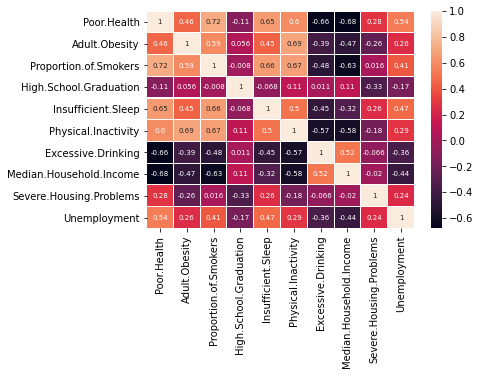

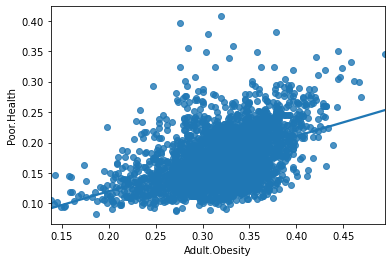

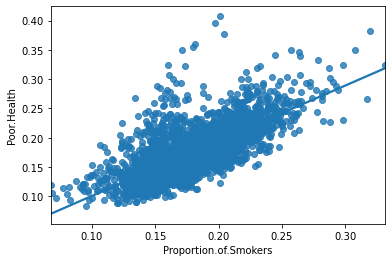

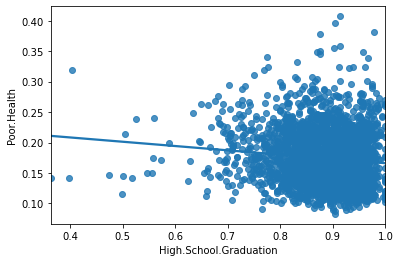

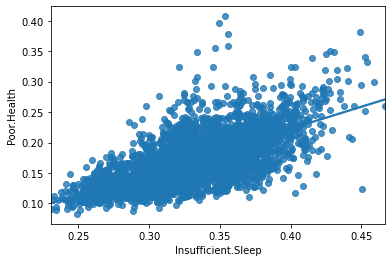

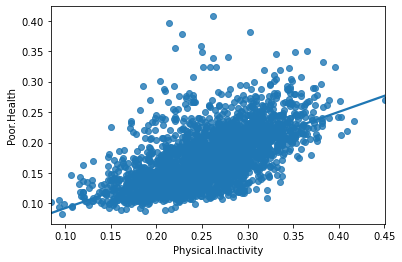

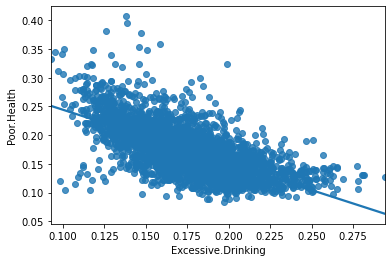

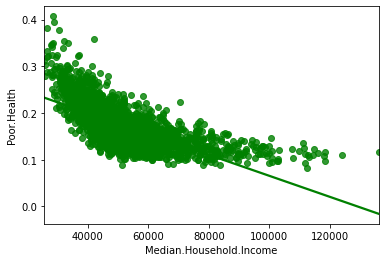

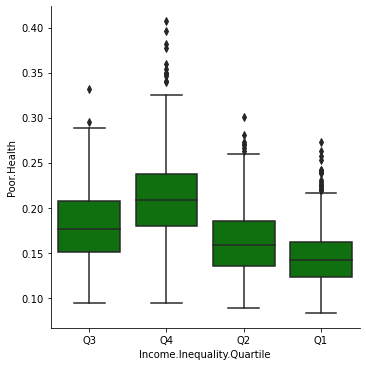

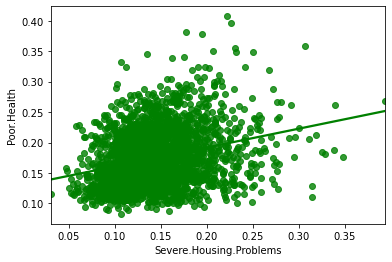

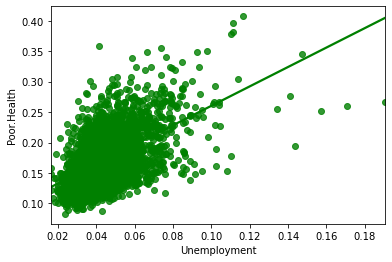

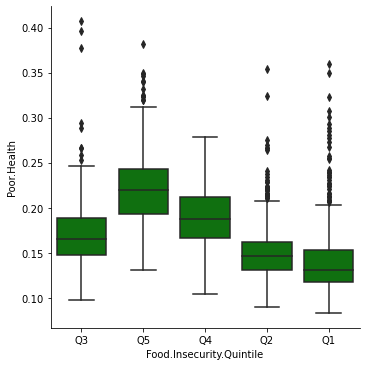

In [12]:
#Question 1: Which social determinants of health best predicts poor health status - behavioral or environmental?
#Examine linear relationships
##Method 1: Via correlation matrix
#Construct heatmap
corr_df = county_data.drop(columns=['Uninsured', 'Primary.Care.Physicians.Per.1000', 'Mental.health.providers.Per.1000', 'Five-digit.FIPS.Code', 'State.FIPS.Code', 'County.FIPS.Code', 'State.Abbreviation', 'CountyName', 'Election.Results.2016', 'Percent.Rural','Over.65','Percent.Females','Life.Expectancy', 'Population'])
corrMatrix = corr_df.corr()
sns.heatmap(corrMatrix, linewidths=0.1, annot=True, annot_kws={"fontsize":7})
plt.show()
##Method 2: Via plots
sns.regplot(x="Adult.Obesity", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="Proportion.of.Smokers", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="High.School.Graduation", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="Insufficient.Sleep", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="Physical.Inactivity", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="Excessive.Drinking", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="Median.Household.Income", y="Poor.Health", data=county_data, ci=None, color = 'green')
plt.show()
sns.catplot(x="Income.Inequality.Quartile", y="Poor.Health", data=county_data, kind = "box", ci=None, color = 'green')
plt.show()
sns.regplot(x="Severe.Housing.Problems", y="Poor.Health", data=county_data, ci=None, color = 'green')
plt.show()
sns.regplot(x="Unemployment", y="Poor.Health", data=county_data, ci=None, color = 'green')
plt.show()
sns.catplot(x="Food.Insecurity.Quintile", y="Poor.Health", data=county_data, kind = "box", ci=None, color = 'green')
plt.show()

In [13]:
##Method 3: Via regression
import statsmodels as sm
import statsmodels.formula.api as smf
###Deal with continuous predictors first
predictors = ['Adult.Obesity', 'Proportion.of.Smokers', 'High.School.Graduation', 'Insufficient.Sleep', 'Physical.Inactivity', 'Excessive.Drinking', 'Median.Household.Income', 'Severe.Housing.Problems', 'Unemployment']
rsquared_values = []
for i in range(len(predictors)):
    olsmod = smf.ols(formula='Q("Poor.Health") ~ Q("{predictor}")'.format(predictor = predictors[i]), data=county_data)
    olsres = olsmod.fit() 
    olsr2 = olsres.rsquared
    rsquared_values.append(olsr2)
rsquared_dict = dict(zip(predictors, rsquared_values)) 
rsquared_df = pd.DataFrame.from_dict(rsquared_dict, orient='index')
rsquared_sorted = rsquared_df.sort_values(0,ascending=False)
###Now deal with categorical predictors
cat_predictors = ['Income.Inequality.Quartile', 'Food.Insecurity.Quintile']
cat_rsquared_values = []
for i in range(len(cat_predictors)):
    olsmod2 = smf.ols(formula='Q("Poor.Health") ~ C(Q("{cat_predictor}"))'.format(cat_predictor = cat_predictors[i]), data=county_data)
    olsres2 = olsmod2.fit() 
    olsr22 = olsres2.rsquared
    cat_rsquared_values.append(olsr22)
cat_rsquared_dict = dict(zip(cat_predictors, cat_rsquared_values))
cat_rsquared_df = pd.DataFrame.from_dict(cat_rsquared_dict, orient='index')
cat_rsquared_sorted = cat_rsquared_df.sort_values(0,ascending=False)
###Results
print(rsquared_sorted)
print(cat_rsquared_sorted)

##Method 4: Via multivariate regression
###Behavioral multivariate model
b_mod = smf.ols(formula='Q("Poor.Health") ~ Q("Adult.Obesity") + Q("Proportion.of.Smokers") + Q("High.School.Graduation") + Q("Insufficient.Sleep") + Q("Physical.Inactivity") + Q("Excessive.Drinking")', data=county_data)
b_res = b_mod.fit()
b_r2 = b_res.rsquared
###Environmental multivariate model
e_mod = smf.ols(formula='Q("Poor.Health") ~ Q("Median.Household.Income") + C(Q("Income.Inequality.Quartile")) + Q("Severe.Housing.Problems") + Q("Unemployment") + C(Q("Food.Insecurity.Quintile"))', data=county_data)
e_res = e_mod.fit()
e_r2 = e_res.rsquared
###Results
print(b_r2)
print(e_r2)

                                0
Proportion.of.Smokers    0.523979
Median.Household.Income  0.462599
Excessive.Drinking       0.436368
Insufficient.Sleep       0.425817
Physical.Inactivity      0.363783
Unemployment             0.296324
Adult.Obesity            0.208326
Severe.Housing.Problems  0.078831
High.School.Graduation   0.012174
                                   0
Food.Insecurity.Quintile    0.392009
Income.Inequality.Quartile  0.270255
0.6872417061838891
0.6283591564428039


## Question 2
In order to check which social determinants of health best predict poor health status, I will begin by examining the linear relationships between these variables and the poor health proportion variable. 
### Heatmap:
Focusing on the correlations between the selected x-variables and the y-variable "Poor.Health," the following associations stand out: 
1. **Percent Rural and Poor Health (0.32)**: 0.32 indicates a moderate positive linear correlation. This means that as the percent of a county that is considered rural increases, so does the proportion of people with poor health status.
2. **Life Expectancy and Poor Health (-0.64)**: -0.64 indicates a moderate negative linear correlation. This means that as the life expectancy in a county increases, the proportion of people with poor health status decreases.
### Plots:
The plots of these x-variables against the Poor Health variable reaffirm the results of the correlation matrix. Of all the x-variables, **Life Expectancy** seems to fall most linearly when plotted against Poor Health.  
### Univariate Linear Regressions:
Once again constructing individual univariate models for each variable, I calculated and compared the R-squared values of each model. I found that social determinants of health, both behavioral and environmental, seem to explain a higher percentage of the variation in the y-variable Poor Health than any of the demographic characteristics. Of the five demographic characteristics described in the dataset, only one gave an R-squared on par with the social determinants' R-squared values when put in a univariate model. This was **Life Expectancy**.
### Multivariate Linear Regressions:
To gain further insight into the predictive abilities of these demographic characteristics, I put them in a multivariate model. This model performed worse, in terms of R-squared value, than both the multivariate model containing all behavioral predictors and the multivariate model containing all environmental predictors. However, looking at the p-values of each predictor, it seems that **Life Expectancy, Percent of Females, and Proportion over 65** are all statistically significant predictors of poor health proportion.

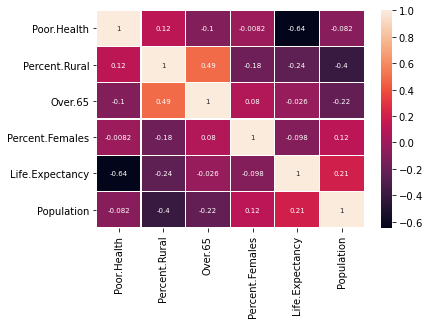

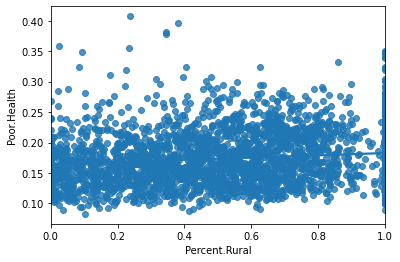

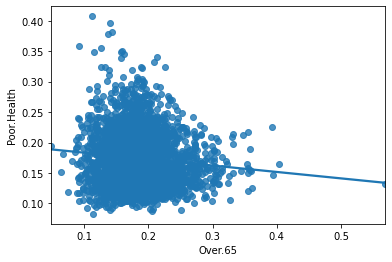

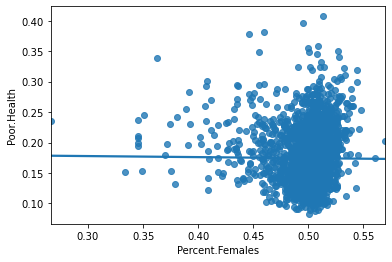

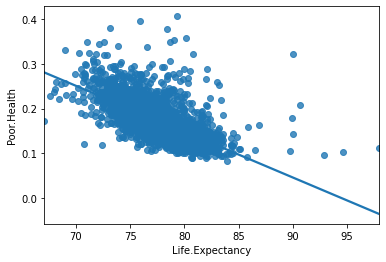

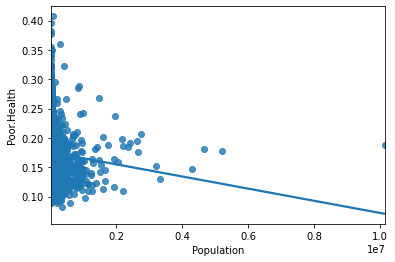

In [14]:
#Question 2: Which demographic characteristics are most important for predicting poor health status?
#Examine linear relationships
##Method 1: Via correlation matrix
#Construct heatmap
corr_df2 = county_data.drop(columns=['Uninsured', 'Primary.Care.Physicians.Per.1000', 'Mental.health.providers.Per.1000', 'Five-digit.FIPS.Code', 'State.FIPS.Code', 'County.FIPS.Code', 'State.Abbreviation', 'CountyName', 'Election.Results.2016', 'Adult.Obesity', 'Proportion.of.Smokers','High.School.Graduation','Insufficient.Sleep','Physical.Inactivity','Excessive.Drinking','Median.Household.Income','Severe.Housing.Problems','Unemployment','Food.Insecurity.Quintile','Income.Inequality.Quartile'])
corrMatrix2 = corr_df2.corr()
sns.heatmap(corrMatrix2, linewidths=0.1, annot=True, annot_kws={"fontsize":7})
plt.show()

##Method 2: Via plots
sns.regplot(x="Percent.Rural", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="Over.65", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="Percent.Females", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="Life.Expectancy", y="Poor.Health", data=county_data, ci=None)
plt.show()
sns.regplot(x="Population", y="Poor.Health", data=county_data, ci=None)
plt.show()

In [15]:
##Method 3: Via regression
dem_predictors = ['Percent.Rural', 'Over.65', 'Percent.Females', 'Life.Expectancy', 'Population']
r2_values = []
for i in range(len(dem_predictors)):
    mod = smf.ols(formula='Q("Poor.Health") ~ Q("{predictor}")'.format(predictor = dem_predictors[i]), data=county_data)
    res = mod.fit() 
    r2 = res.rsquared
    r2_values.append(r2)
r2_dict = dict(zip(dem_predictors, r2_values)) 
r2_df = pd.DataFrame.from_dict(r2_dict, orient='index')
r2_sorted = r2_df.sort_values(0,ascending=False)
###Results
print(r2_sorted)

##Method 4: Via multivariate regression
###Demographic characteristics multivariate model
d_mod = smf.ols(formula='Q("Poor.Health") ~ Q("Percent.Rural") + Q("Over.65") + Q("Percent.Females") + Q("Life.Expectancy") + Q("Population")', data=county_data)
d_res = d_mod.fit()
d_r2 = d_res.rsquared
d_sum = d_res.summary()
###Results
print(d_r2)
print(d_sum)

                        0
Life.Expectancy  0.415369
Percent.Rural    0.015458
Over.65          0.010872
Population       0.006649
Percent.Females  0.000067
0.43601084143957003
                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     418.9
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:51:02   Log-Likelihood:                 5334.4
No. Observations:                2715   AIC:                        -1.066e+04
Df Residuals:                    2709   BIC:                        -1.062e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef   

## Question 3
In order to understand the associations between variables in these three categories (Social Determinants of Health - Behavioral, Social Determinants of Health - Environmental, Demographic Characteristics), I will construct a **correlation matrix**. I will examine the variables that are strongly correlated with each other in further depth.
### Correlation Matrix:
1. **Physical Inactivity and Adult Obesity (0.69)**: 0.69 indicates a moderate positive linear correlation. This means that as the proportion of a county's population that is phsycially inactive goes up, so does the proportion of the county's adults that is considered medically obese. 
2. **Proportion of Smokers and Life Expectancy (-0.71)**: -0.71 indicates a moderate negative linear correlation. This means that as the proportion of smokers in a county increases, the county's life expectancy decreases.
3. **Physical Inactivity and Proportion of Smokers (0.67)**: 0.67 indicates a moderate positive linear correlation. This means that as the proportion of a county's population that is physically inactive goes up, so does the proportion of smokers in the county.
4. **Proportion of Smokers and Median Household Income (-0.63)**: -0.63 indicates a moderate negative linear correlation. This means that as the proportion of smokers in a county increases, the median household income in the county decreases.
5. **Proportion of Smokers and Insufficient Sleep (0.66)**: 0.66 indicates a moderate positive linear correlation. This means that as the proportion of smokers in a county increases, so does the proportion of the county's population indicating insufficient sleep.
### Plots:
Plotting some of these **strongly-correlated x-variables** against each other and **faceting by state**, it is interesting to observe the trends that emerge. For example, datapoints in **Texas**, a state earlier flagged for potentially large health disparities, seem **scattered quite broadly** on all three plots (Physical Inactivity vs. Adult Obesity, Proportion of Smokers vs. Life Expectancy, Proportion of Smokers vs. Median Household Income). This might reflect large differences across Texan counties in these variables - some of which have been shown to have at least **moderate linear correlations** with the y-variable Poor Health. 

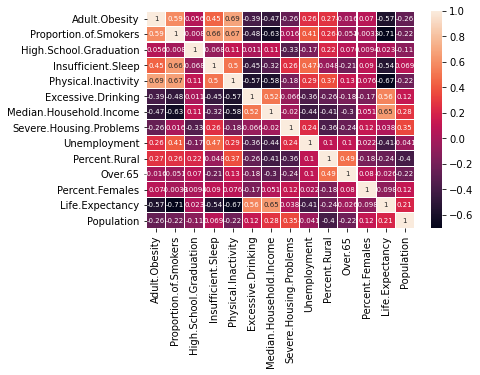

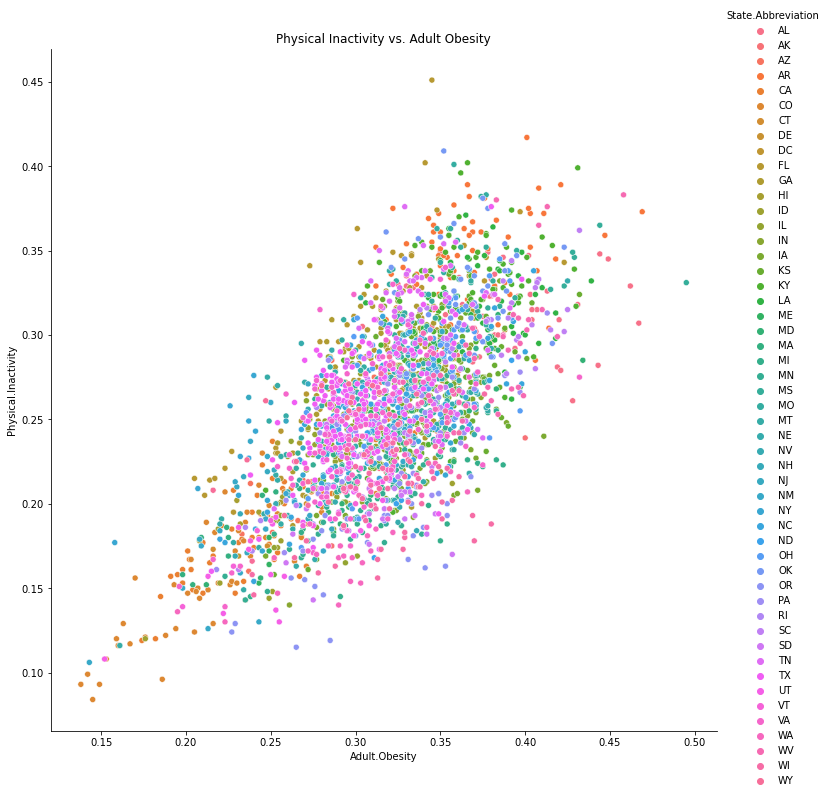

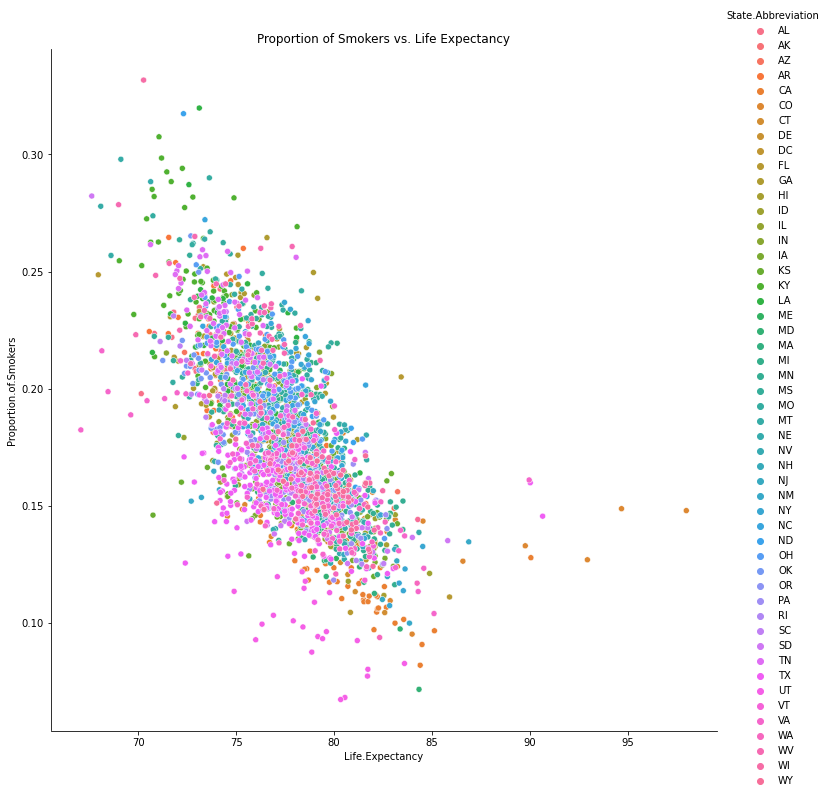

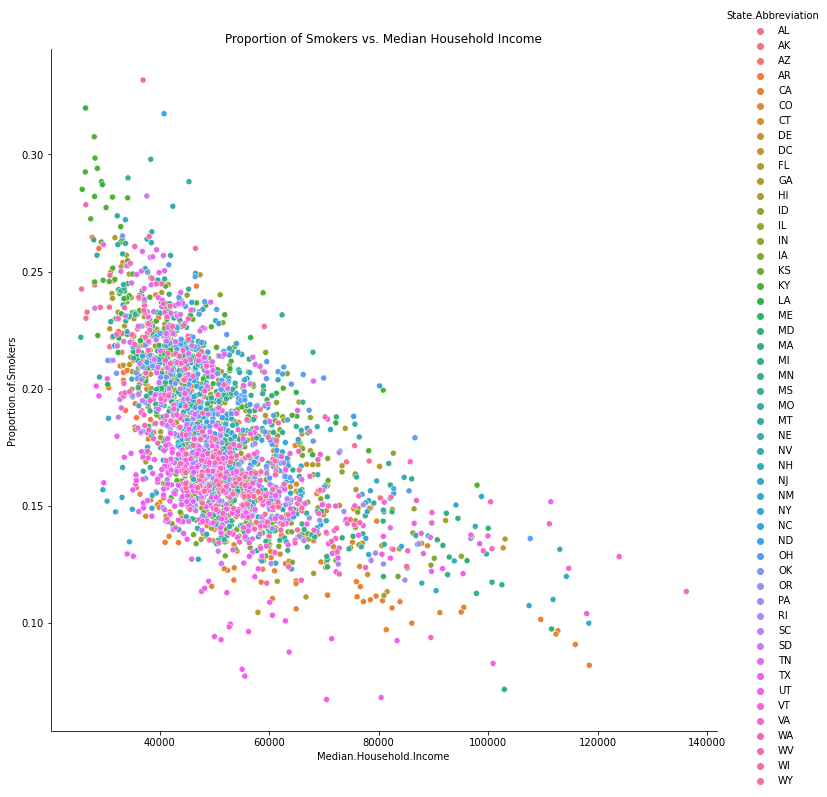

In [17]:
#Construct heatmap
corr_df3 = county_data.drop(columns=['Uninsured', 'Primary.Care.Physicians.Per.1000', 'Mental.health.providers.Per.1000', 'Five-digit.FIPS.Code', 'State.FIPS.Code', 'County.FIPS.Code', 'State.Abbreviation', 'CountyName', 'Poor.Health', 'Election.Results.2016'])
corrMatrix3 = corr_df3.corr()
sns.heatmap(corrMatrix3, linewidths=0.1, annot=True, annot_kws={"fontsize":7})
plt.show()
#Construct plots by state
##Inactivity v. Obesity
sns.relplot(x = 'Adult.Obesity', y = 'Physical.Inactivity', hue = 'State.Abbreviation', data = county_data, height=10).set(title='Physical Inactivity vs. Adult Obesity')
plt.show()
##Smoking v. Life Expectancy
sns.relplot(x = 'Life.Expectancy', y = 'Proportion.of.Smokers', hue = 'State.Abbreviation', data = county_data, height=10).set(title='Proportion of Smokers vs. Life Expectancy')
plt.show()
##Smoking v. Median Household Income
sns.relplot(x = 'Median.Household.Income', y = 'Proportion.of.Smokers', hue = 'State.Abbreviation', data = county_data, height=10).set(title='Proportion of Smokers vs. Median Household Income')
plt.show()

## Question 4

### Preliminary Analysis:

According to the plot below, the top five states with the largest disparities in poor health status are: **Texas (TX), Louisiana (LA), Wisconsin (WI), Kentucky (KY), and Georgia (GA)**. Interestingly, counties in both Texas and Louisiana were among the top five counties from this dataset with highest proportion of poor health. Kentucky was one of the top five states from this dataset with highest mean per-county poor health proportion.

In order to understand which factors might be associated with these states' large health disparities, it is interesting to look back on the results from the earlier analysis of x-variables. The three highest R-squared values came from univariate models created with the following predictors: **Proportion of Smokers, Median Household Income, and Excessive Drinking**. Additionally, there is an existing, county-level measure of inequality - **Income Inequality Quartile** - that might reveal more about health inequities. 

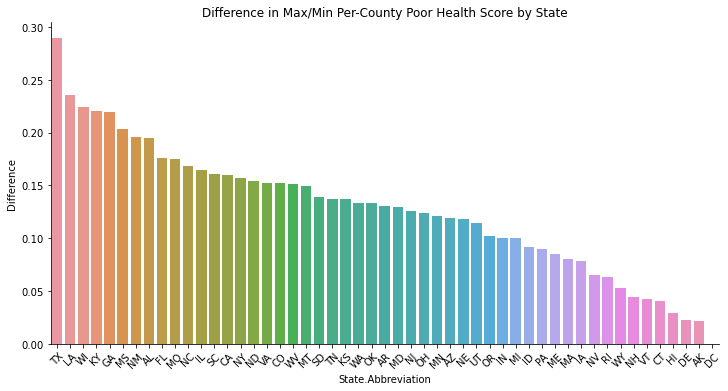

In [18]:
#Calculate Difference
state_difference = county_data.groupby('State.Abbreviation').agg({'Poor.Health': ['min', 'max']}) 
state_difference['Difference'] = state_difference[('Poor.Health', 'max')] - state_difference[('Poor.Health', 'min')]
#Plot
state_difference.reset_index(inplace = True)
state_difference_sorted = state_difference.sort_values(by=['Difference'],ascending=False)
sns.catplot(x = 'State.Abbreviation', y = "Difference", data = state_difference_sorted, kind = "bar", aspect=2).set(title = 'Difference in Max/Min Per-County Poor Health Score by State')
plt.xticks(rotation = 45)
plt.show()

In [21]:
#Add 'Difference' column to county_name DataFrame
state_difference.set_index('State.Abbreviation', inplace=True)
states = county_data['State.Abbreviation']
differences = []
for i in range(len(states)):
    difference = state_difference.loc[states[i], 'Difference']
    differences.append(difference)
print(len(differences))
c_differences = pd.concat(differences)
c_differences.tolist()
county_data['Difference'] = np.array(c_differences)

2715


## Question 4
In order to assess which x-variables would best predict Difference, which is the difference between the highest and lowest county-level poor health proportion in a state, I constructed a few linear models.

### Univariate Linear Regressions:
I started by constructing univariate linear models using each of the following potential x-variables as a separate predictor: **Income Inequality Quartile, Proportion of Smokers, Median Household Income, and Excessive Drinking**. I then compared the R-squared values generated by each model. While none of the models generated a particularly high R-squared value, the predictor that ranked the highest in terms of this metric was **Income Inequality Quartile**. 
### Multivariate Linear Regression:
To gain further insight into how to explain the gap between counties in health status, I constructed a multivariate linear model using these **same variables**. I found that based on a 5% significance level, both **Income Inequality Quartile and Median Household Income were statistically significant predictors** of Difference, suggesting that **income disparities might translate to  health disparities**. However, it is important to note that the model had quite a low R-squared value of 0.095. This means that the model could only explain 9.5% of the variation in the Difference variable.

In [24]:
#Regressions
##Income Inequality
II_mod = smf.ols(formula='Difference ~ C(Q("Income.Inequality.Quartile"))', data=county_data)
II_res = II_mod.fit()
II_sum = II_res.summary()
II_r2 = II_res.rsquared
##Proportion of Smokers
p_mod = smf.ols(formula='Difference ~ Q("Proportion.of.Smokers")', data=county_data)
p_res = p_mod.fit()
p_sum = p_res.summary()
p_r2 = p_res.rsquared
##Median Household Income
m_mod = smf.ols(formula='Difference ~ Q("Median.Household.Income")', data=county_data)
m_res = m_mod.fit()
m_sum = m_res.summary()
m_r2 = m_res.rsquared
##Excessive Drinking
d_mod = smf.ols(formula='Difference ~ Q("Excessive.Drinking")', data=county_data)
d_res = d_mod.fit()
d_sum = d_res.summary()
d_r2 = d_res.rsquared
##Multivariate Regressions
multi_mod = smf.ols(formula='Difference ~ Q("Excessive.Drinking") + C(Q("Income.Inequality.Quartile")) + Q("Median.Household.Income")+ Q("Proportion.of.Smokers")', data=county_data)
multi_res = multi_mod.fit()
multi_sum = multi_res.summary()
multi_r2 = multi_res.rsquared
#Results
print(II_r2)
print(p_r2)
print(m_r2)
print(d_r2 )
print(multi_sum)

0.08112318970786714
0.018943475875645155
0.044378551158047896
0.01918145932782389
                            OLS Regression Results                            
Dep. Variable:             Difference   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     47.42
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           1.51e-55
Time:                        19:37:29   Log-Likelihood:                 4025.0
No. Observations:                2715   AIC:                            -8036.
Df Residuals:                    2708   BIC:                            -7995.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------

# Predictive Model

## Predicting Poor Health
To build a predictive model for the y-variable Poor Health, I constructed a **regression tree**. I used a **60:40 train-test split**. I also implemented **cost complexity pruning** in order to balance the **bias/variance trade-off** and select the best tree. The ending **R-squared value** of my regression tree was **~0.72**, which is higher than any of the R-squared values I achieved through my earlier linear regressions.
### Variable Importance Ranking
These are the top 5 variables in order of their importance for this tree:                  
1. **Median.Household.Income** (importance: **0.699**)
2. **Life.Expectancy** (importance: **0.130**)
3. **Over.65** (importance: **0.071**)
4. **Insufficient.Sleep** (importance: **0.051**)
5. **Excessive.Drinking** (importance: **0.027**)

### Returning to Questions 1 & 2
The first two questions I posed probed **1)**, which social determinants - behavioral or environmental - are better predictors of y-variable Poor Health, and **2)** which demographic characteristics are the best predictors of y-variable Poor Health. In response to the first question, **results from the regression tree seem to align somewhat with the results from my linear models**. The R-squared values from my linear models suggested that behavioral social determinants, such as **Proportion of Smokers, Insufficient Sleep, and Excessive Drinking**, were the best predictors of Poor Health. The regression tree's variable importance ranking suggests that some behavioral social determinants, such as **Insufficient Sleep and Excessive Drinking** are important, but that in fact one key environmental social determinant, **Median Household Income**, is the most important. Furthermore, the earlier linear models understated the importance of **demographic characteristics** relative to the regression tree's results. While the earlier model captured the usefulness of the **Life Expectancy** predictor, it did not pick up on the importance of the **Over 65** predictor. These differences are understandable because decision trees are non-linear, enabling them to capture non-linearity in the data. In the end, based on R-squared values, the **regression tree did a better job of predicting Poor Health than any of the earlier linear models**.

In [25]:
#Preparing the data
Xcts = county_data[['Percent.Rural', 'Over.65', 'Percent.Females', 'Life.Expectancy', 'Population','Adult.Obesity', 'Proportion.of.Smokers', 'High.School.Graduation', 'Insufficient.Sleep', 'Physical.Inactivity', 'Excessive.Drinking', 'Median.Household.Income', 'Severe.Housing.Problems', 'Unemployment']]
Xcat = county_data[['Income.Inequality.Quartile', 'Food.Insecurity.Quintile']]
Xcat2 = pd.get_dummies(Xcat)
X = pd.concat([Xcts, Xcat2], axis=1)
y = county_data[['Poor.Health']]

In [26]:
#Create the train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1629, 23)
(1086, 23)


In [27]:
#Create a regression tree
from sklearn import tree
dtr = tree.DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [28]:
#Use the model to get a prediction
y_pred_dtr = dtr.predict(X_test)
#R2 value
print(dtr.score(X_test, y_test))

0.7072130358304457


In [29]:
#Cost Complexity Pruning
##Create a pruning path
path = dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities 
##Fitting the decision tree for each value of α
rgrs = [] 
for ccp_alpha in ccp_alphas: 
    dtr = tree.DecisionTreeRegressor(random_state=0, max_leaf_nodes = 20, ccp_alpha=ccp_alpha)
    dtr.fit(X_train, y_train)
    rgrs.append(dtr)
## Obtain the "score" for each tree
train_scores = [dtr.score(X_train, y_train) for dtr in rgrs] 
test_scores = [dtr.score(X_test, y_test) for dtr in rgrs] 
## Find the best tree.
best = pd.Series(test_scores).idxmax() 
print(test_scores[best])
best_tree = rgrs[best]

0.7235311367013137


In [30]:
#Obtaining variable importance ranking
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(best_tree.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
print(importances[:5]) 

                    Feature  Importance
11  Median.Household.Income       0.699
3           Life.Expectancy       0.130
1                   Over.65       0.071
8        Insufficient.Sleep       0.051
10       Excessive.Drinking       0.027


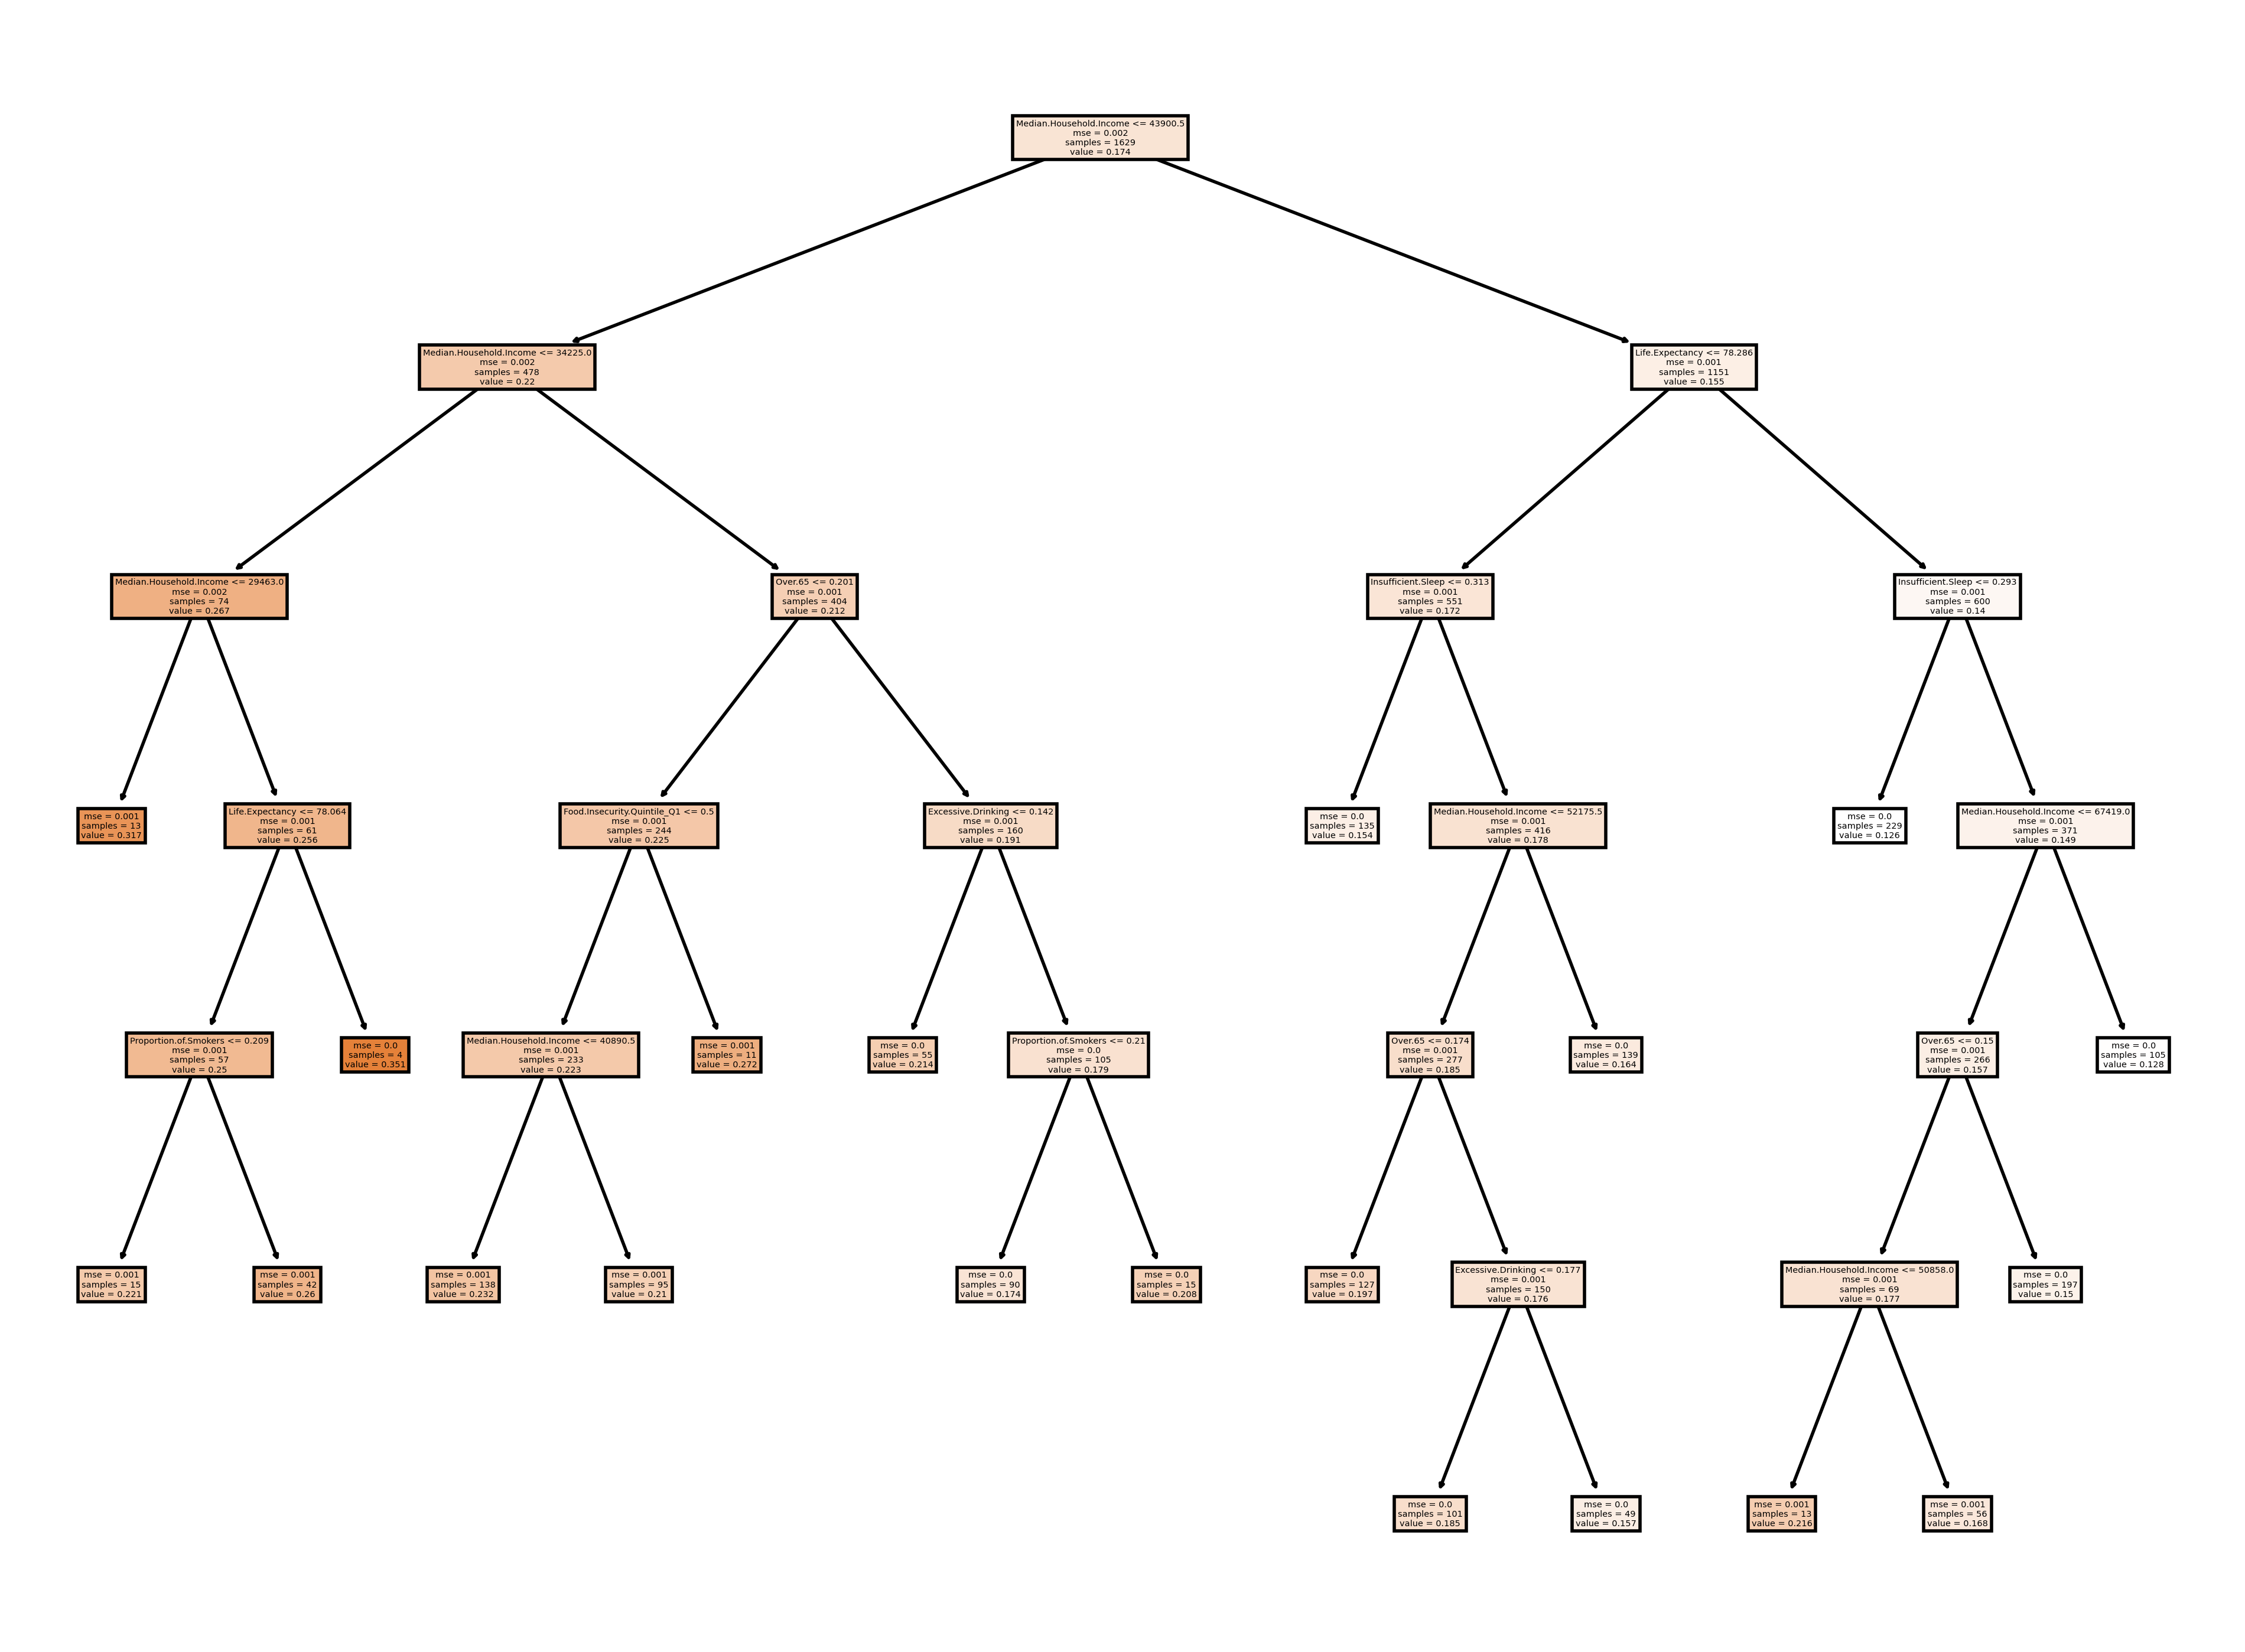

In [31]:
#Plotting best tree
fig = plt.figure(num=None, figsize=(12, 9), dpi=400, facecolor='w', edgecolor='k')
tree.plot_tree(best_tree, filled=True, feature_names=X.columns)
plt.show()

## Predicting Difference
To build a predictive model for the difference between the highest and lowest poor health proportions in a state, I constructed a **regression tree** using the given county-level variables as predictors. I used a **60:40 train-test split**. I also implemented **cost complexity pruning** in order to balance the **bias/variance trade-off** and select the best tree. The ending **R-squared value** of my regression tree was **~0.27**, which is higher than any of the R-squared values I achieved through my earlier linear regressions.
### Variable Importance Ranking
These are the top 5 variables in order of their importance for this tree:                  
1. **Insufficient.Sleep** (importance: **0.355**)
2. **High.School.Graduation** (importance: **0.158**)
3. **Physical.Inactivity** (importance: **0.103**)
4. **Food.Insecurity.Quintile_Q5** (importance: **0.092**)
5. **Proportion.of.Smokers** (importance: **0.078**)

### Returning to Question 4
The fourth and final question I posed looked into the largest health disparities on a statewide level. Seeing the range in disparities across states, I tried to find which county-level variables best predicted this difference. **Results from the regression tree did not align with the results from my earlier linear models**. The R-squared values and p-values from my linear models suggested that income-related variables, such as **Income Inequality Quartile and Median Household Income**, were the best predictors of Difference. The regression tree's variable importance ranking, however, suggests that other variables, not related to income, such as **Insufficient Sleep, Physical Inactivity, and Food Insecurity Quintile**. My linear models did not examine the predictive power of variables such as **High School Graduation** which is ranked second in terms of variable importance for the regression tree. These differences are understandable because decision trees are non-linear, enabling them to capture non-linearity in the data. Additionally, there are predictors whose predictive power I simply did not think to test in my earlier linear models. In the end, based on R-squared values, the **regression tree did a better job of predicting Difference than any of the earlier linear models**.

In [32]:
#Preparing the data
y2 = county_data[['Difference']]

In [33]:
#Create the train/test split
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1629, 23)
(1086, 23)


In [34]:
#Create a regression tree
from sklearn import tree
dtr2 = tree.DecisionTreeRegressor(random_state=0)
dtr2.fit(X_train,y2_train)

DecisionTreeRegressor(random_state=0)

In [35]:
#Use the model to get a prediction
y_pred_dtr2 = dtr2.predict(X_test)
#R2 value
print(dtr2.score(X_test, y2_test))

0.035923842562994523


In [36]:
#Cost Complexity Pruning
##Create a pruning path
path2 = dtr2.cost_complexity_pruning_path(X_train, y2_train)
ccp_alphas2, impurities2 = path2.ccp_alphas, path2.impurities 
##Fitting the decision tree for each value of α
rgrs2 = [] 
for ccp_alpha2 in ccp_alphas2: 
    dtr2 = tree.DecisionTreeRegressor(random_state=0, max_leaf_nodes = 20, ccp_alpha=ccp_alpha2)
    dtr2.fit(X_train, y2_train)
    rgrs2.append(dtr2)
## Obtain the "score" for each tree
train_scores2 = [dtr2.score(X_train, y2_train) for dtr2 in rgrs2] 
test_scores2 = [dtr2.score(X_test, y2_test) for dtr2 in rgrs2] 
## Find the best tree.
best2 = pd.Series(test_scores2).idxmax() 
print(test_scores2[best2])
best_tree2 = rgrs2[best2]

0.2719257101182069


In [37]:
#Obtaining variable importance ranking
importances2 = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(best_tree2.feature_importances_,3)})
importances2 = importances2.sort_values('Importance',ascending=False)
print(importances2[:5]) 

                        Feature  Importance
8            Insufficient.Sleep       0.355
7        High.School.Graduation       0.158
9           Physical.Inactivity       0.103
22  Food.Insecurity.Quintile_Q5       0.092
6         Proportion.of.Smokers       0.078


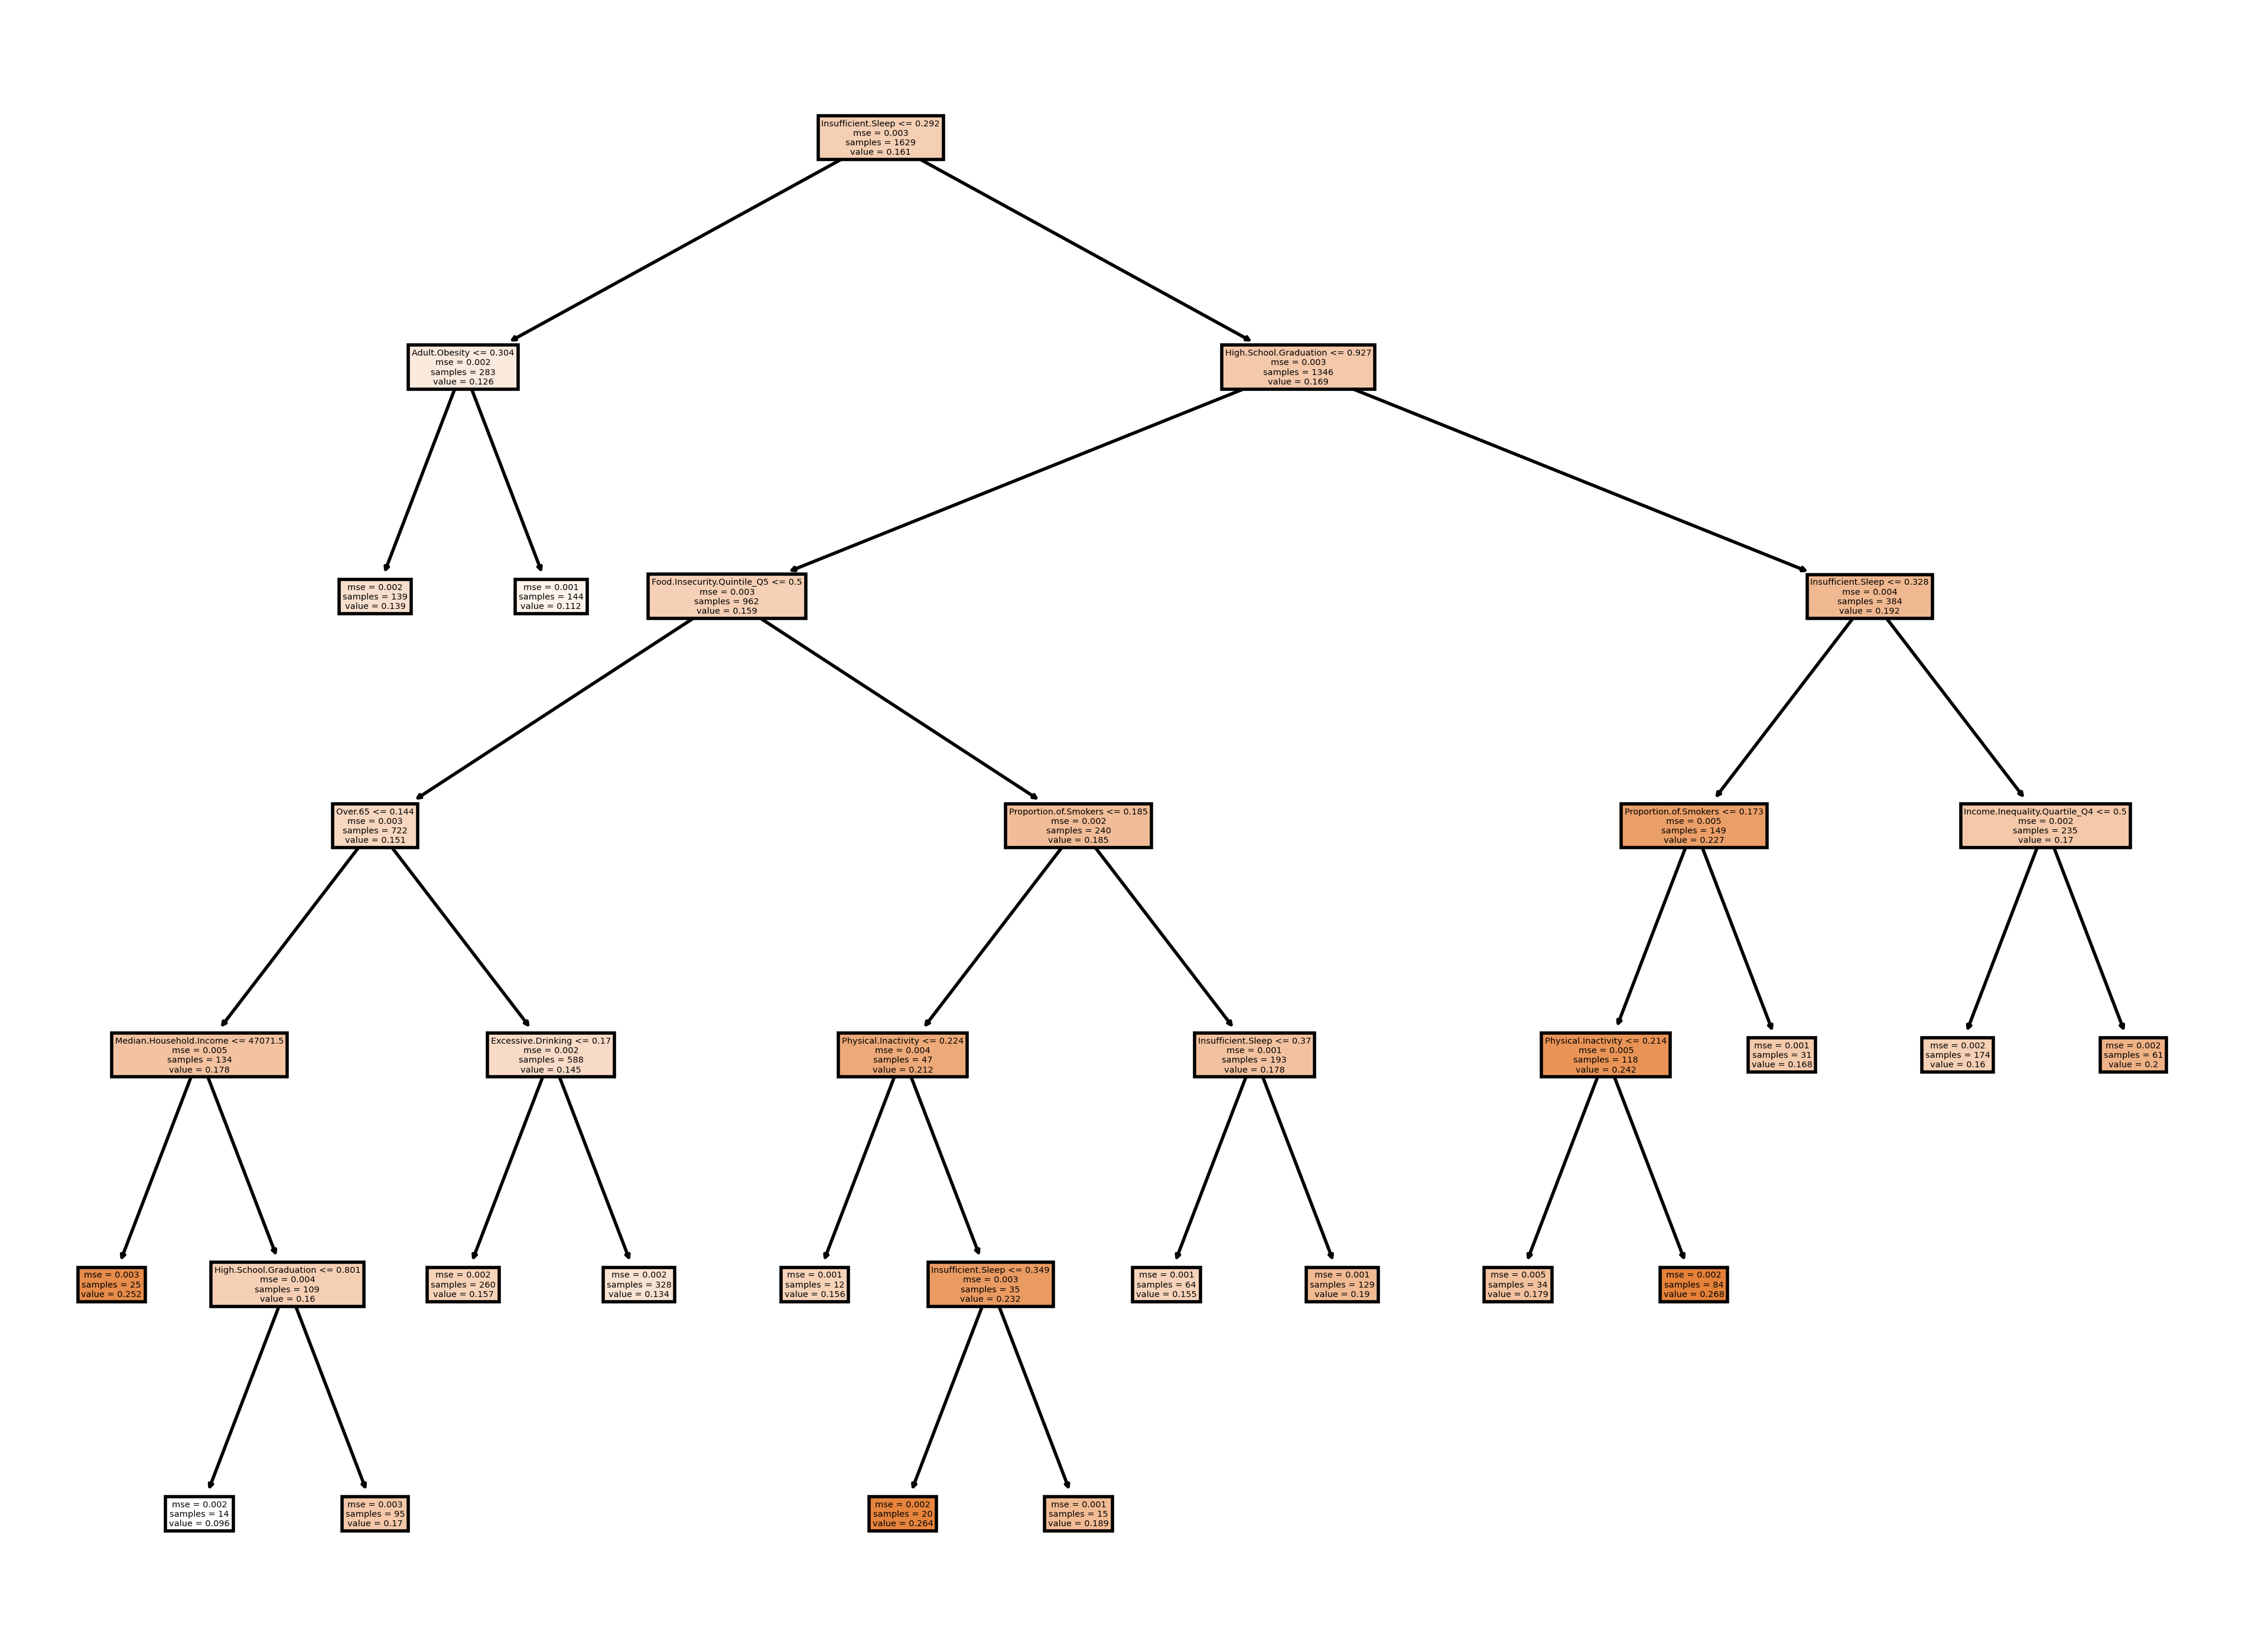

In [38]:
#Plotting best tree
fig2 = plt.figure(num=None, figsize=(12, 9), dpi=400, facecolor='w', edgecolor='k')
tree.plot_tree(best_tree2, filled=True, feature_names=X.columns)
plt.show()

# Conclusions
## Question 1: 
### Which social determinants of health best predict poor health status - behavioral or environmental?
From the perspective of a linear model, my initial analyses would suggest that behavioral social determinants of health best predict Poor Health. However, the regression tree showed that a **mix of behavioral and environmental social determinants of health, along with demographic characteristics**, best predicted Poor Health. The **regression tree** achieved a higher R-squared value, suggesting that a mix of predictors from different variable categories is important for predicting Poor Health.

# Conclusions
## Question 2:
### Which demographic characteristics are most important for predicting poor health status?
From the perspective of a linear model, my initial analyses would suggest that **Life Expectancy** is the most important demographic characteristic for predicting Poor Health. The regression tree showed that **Life Expectancy**, in addition to **Proportion over 65**, was indeed an important demographic characteristic for predicting poor health. The **regression tree** achieved a higher R-squared value than any of the earlier linear models.

# Conclusions
## Question 3
### Are there interesting associations between behavioral determinants of health, environmental determinants of health, and demographic characteristics?
A correlation matrix showed that there are **both positive and negative moderate linear correlations** between variables such as **Median Household Income, Proportion of Smokers, and Insufficient Sleep**, which were deemed important predictors in both the linear models and the regression tree. 

# Conclusions
## Question 4
### Are there states with large health disparities? What could be contributing to those disparities?
In order to investigate this question, I constructed a **"Difference" variable** by subtracting the lowest Poor Health proportion from the highest Poor Health proportion in each state. While neither the linear models nor the regression tree were able to explain more than around **27% of the variation in this Difference variable**, the analysis highlighted **income-related variables**, such as Median Household Income, and **behavioral social determinants of health**, such as Insufficient Sleep, High School Graduation, and Physical Inactivity, as important predictors of Difference. 

## Suggestions for further research

### Further investigate the statewide health disparities mentioned in Question 4.
#### Steps:
1. **Collect more data**: Collecting data for each state at the citizen level rather than solely at the county level would produce more datapoints for investigating these health disparities.
2. **Add more variables**: Investigate other variables besides the ones captured in this dataset to understand the components of health disparities at a more granular level.